In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import os

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', tsname ='Original'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(tsname)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [19]:
def plot_ts_and_points(tser, start_point, step):
    new_series = [None for i in range(len(tser))]
    for i in range(len(tser)):
        pos = start_point + step * i
        if pos >= len(tser):
            break
        new_series[pos] = tser[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        tser.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [4]:
os.chdir(r'd:\ml\временные ряды')

In [5]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

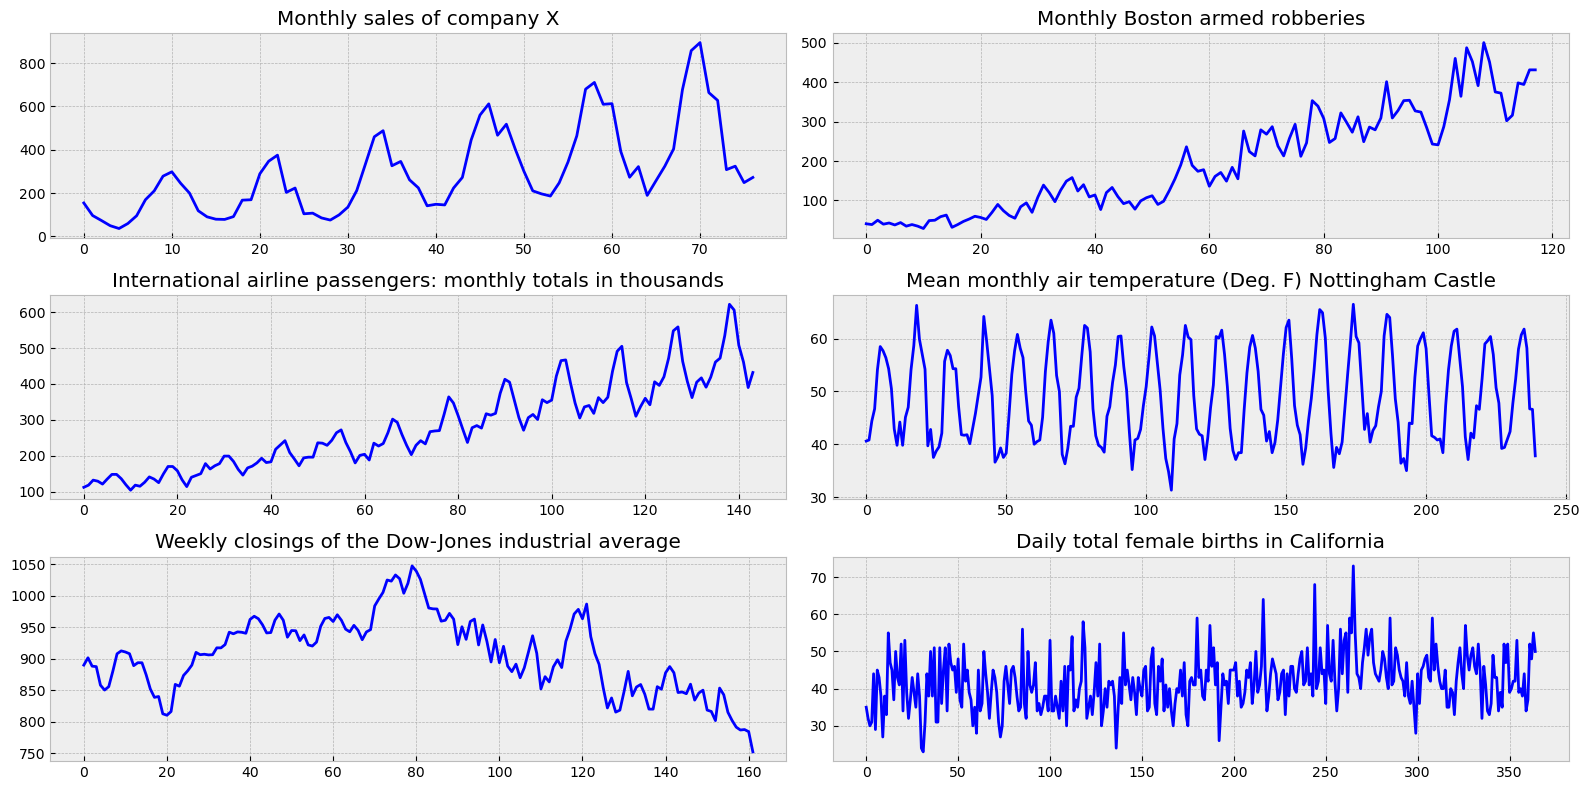

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Sales

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


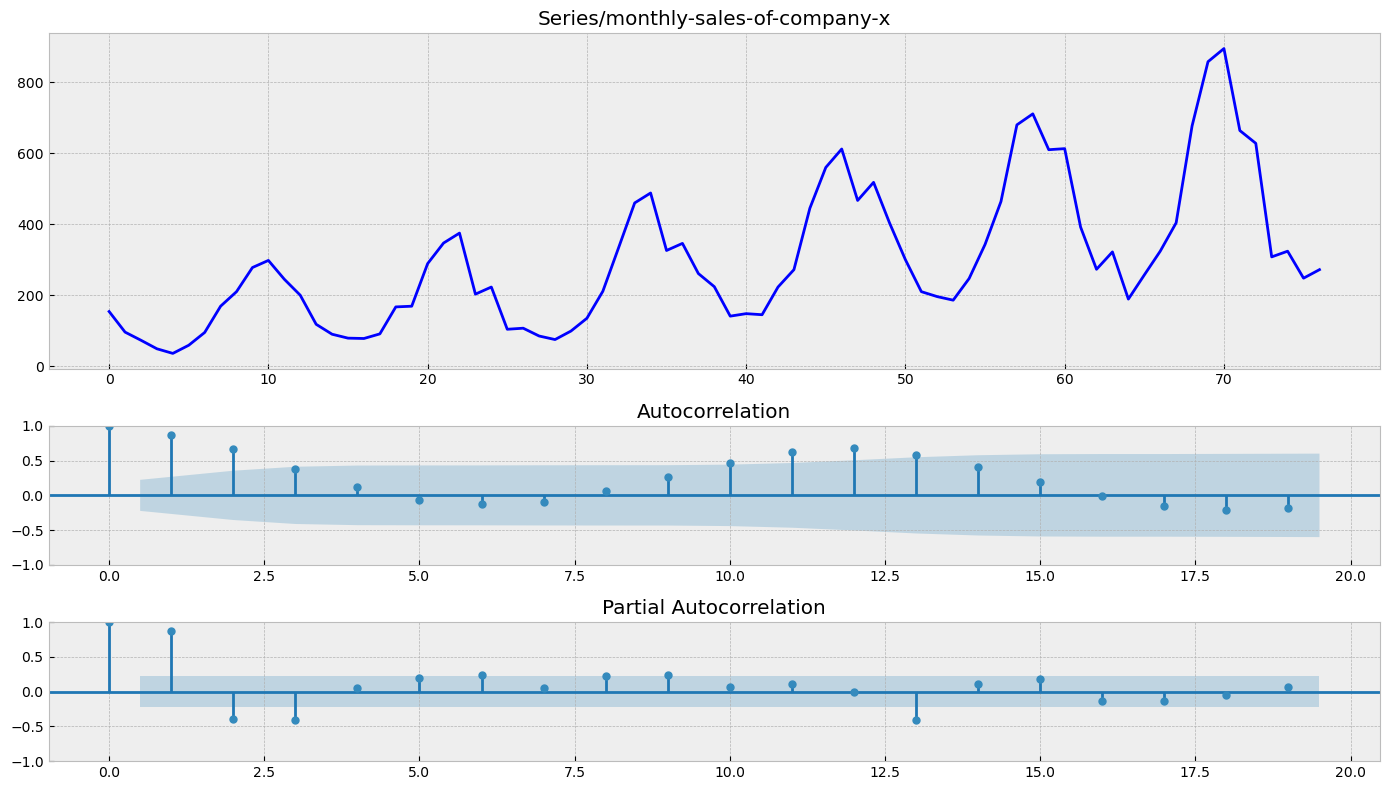

In [11]:
ts = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']
tsplot(ts,tsname = 'Series/monthly-sales-of-company-x')

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


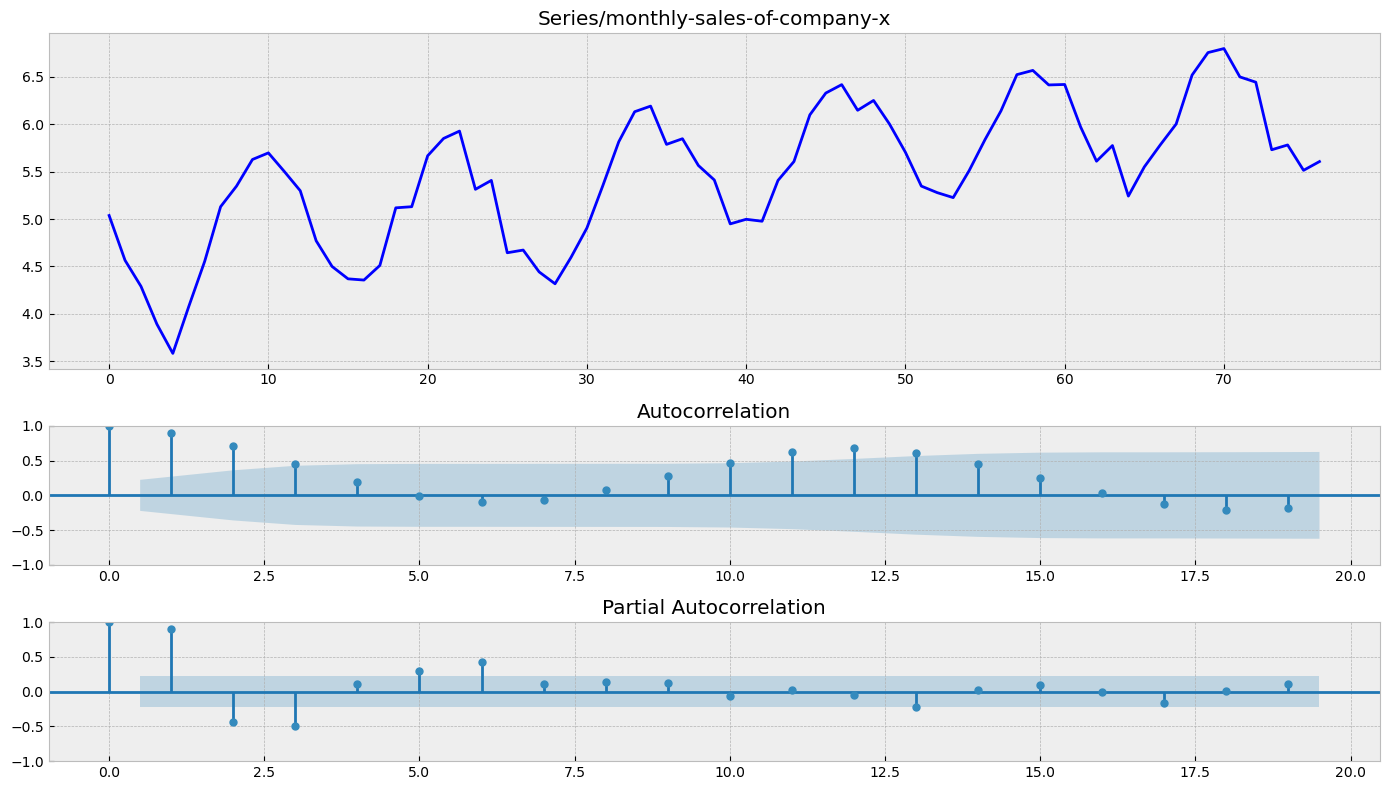

In [12]:
# Ряд не стационарный, тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. 
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
ts = boxcox(ts, 0)
tsplot(ts,tsname = 'Series/monthly-sales-of-company-x')

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


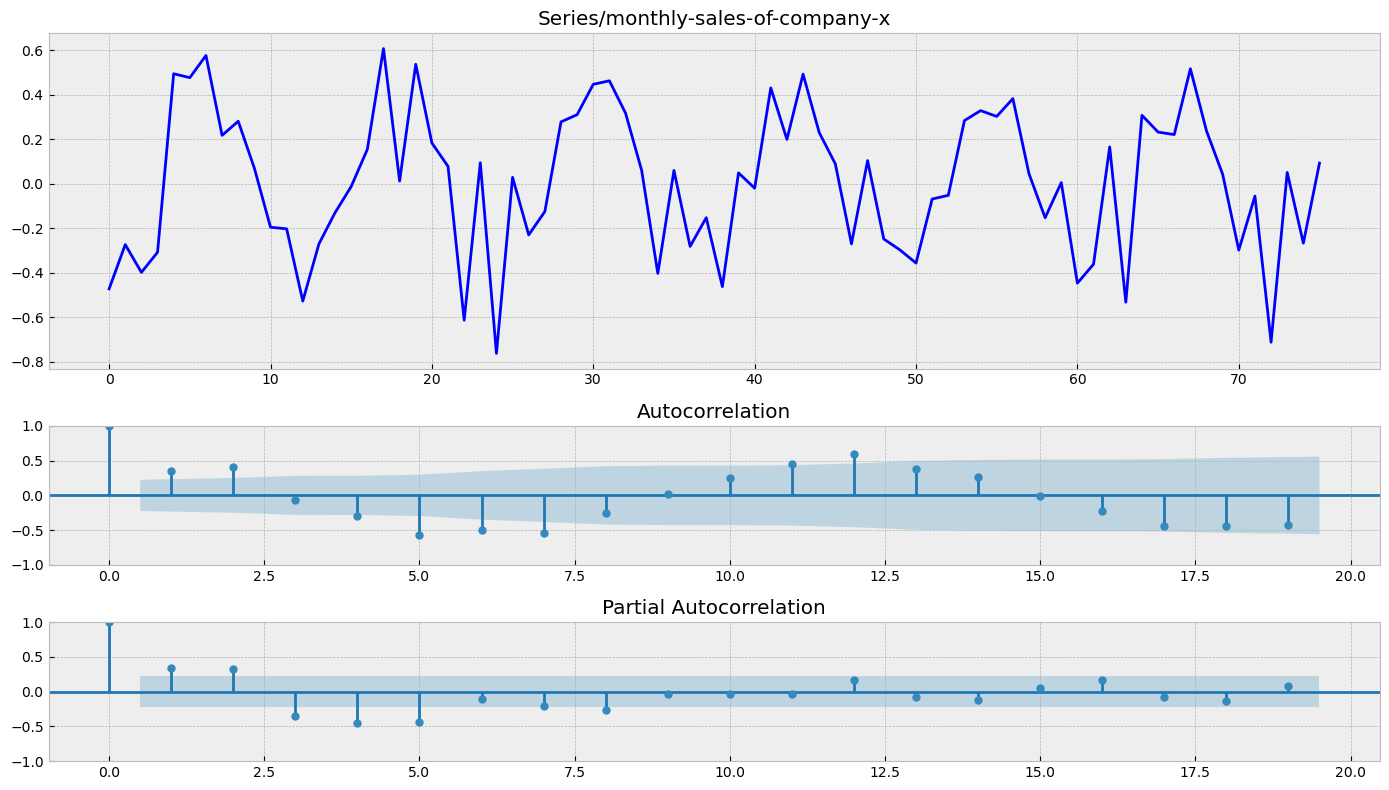

In [14]:
# Дисперсия откорректирована. По графику ряда видно наличие тренда. Уберем его дифференцированием.
ts = np.diff(ts, 1)
tsplot(ts,tsname = 'Series/monthly-sales-of-company-x')

p-value 0.024025, ряд можно считать стационарным

Series/monthly-boston-armed-robberies-j

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


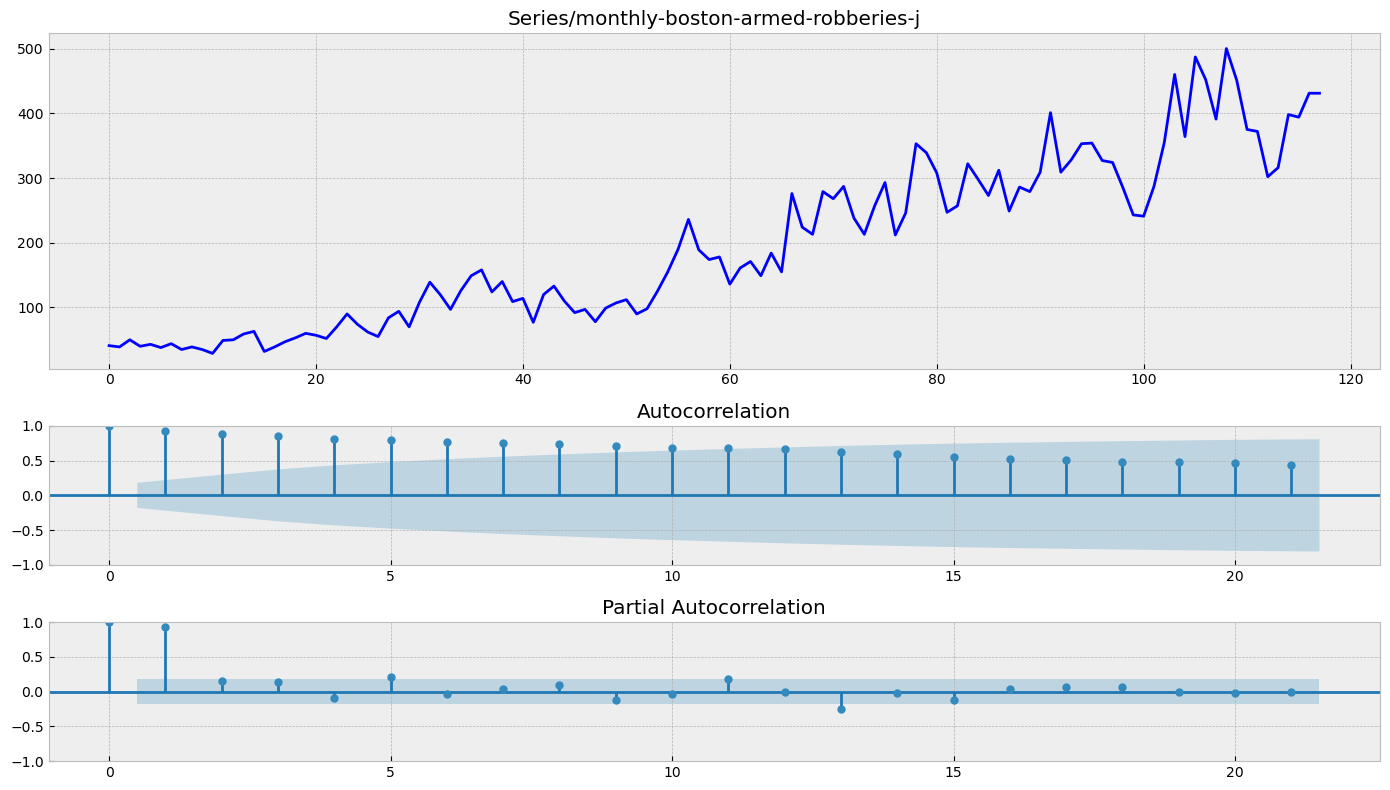

In [22]:
ts = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']
tsplot(ts,tsname = 'Series/monthly-boston-armed-robberies-j')

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


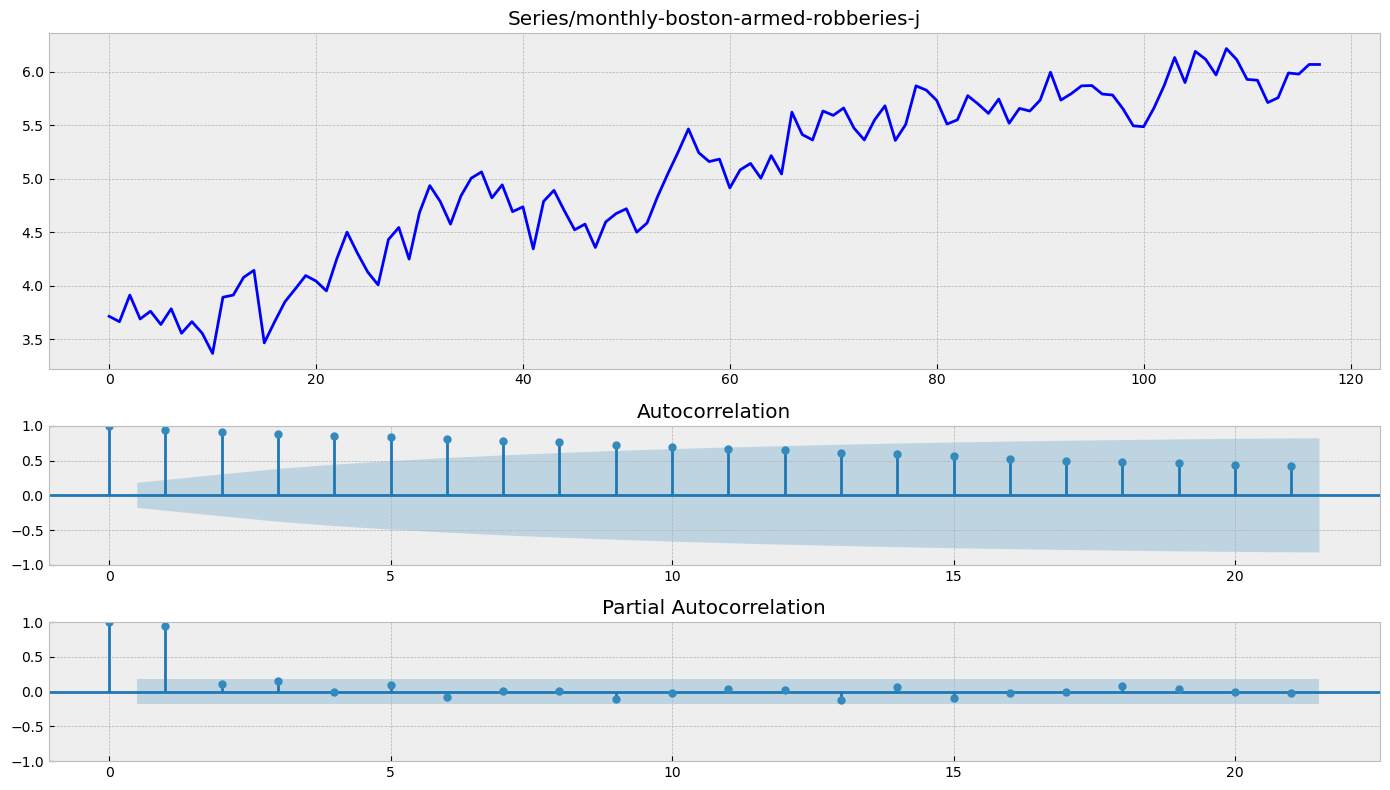

In [23]:
# Ряд не стационарный, тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. 
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
ts = boxcox(ts, 0)
tsplot(ts,tsname = 'Series/monthly-boston-armed-robberies-j')

# Дифференцируем ряд
ts = np.diff(ts, 1)
tsplot(ts,tsname = 'Series/monthly-boston-armed-robberies-j')

2.378602e-11 (0.00000000002378602) < 0.05. Ряд стационарный

Series/international-airline-passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


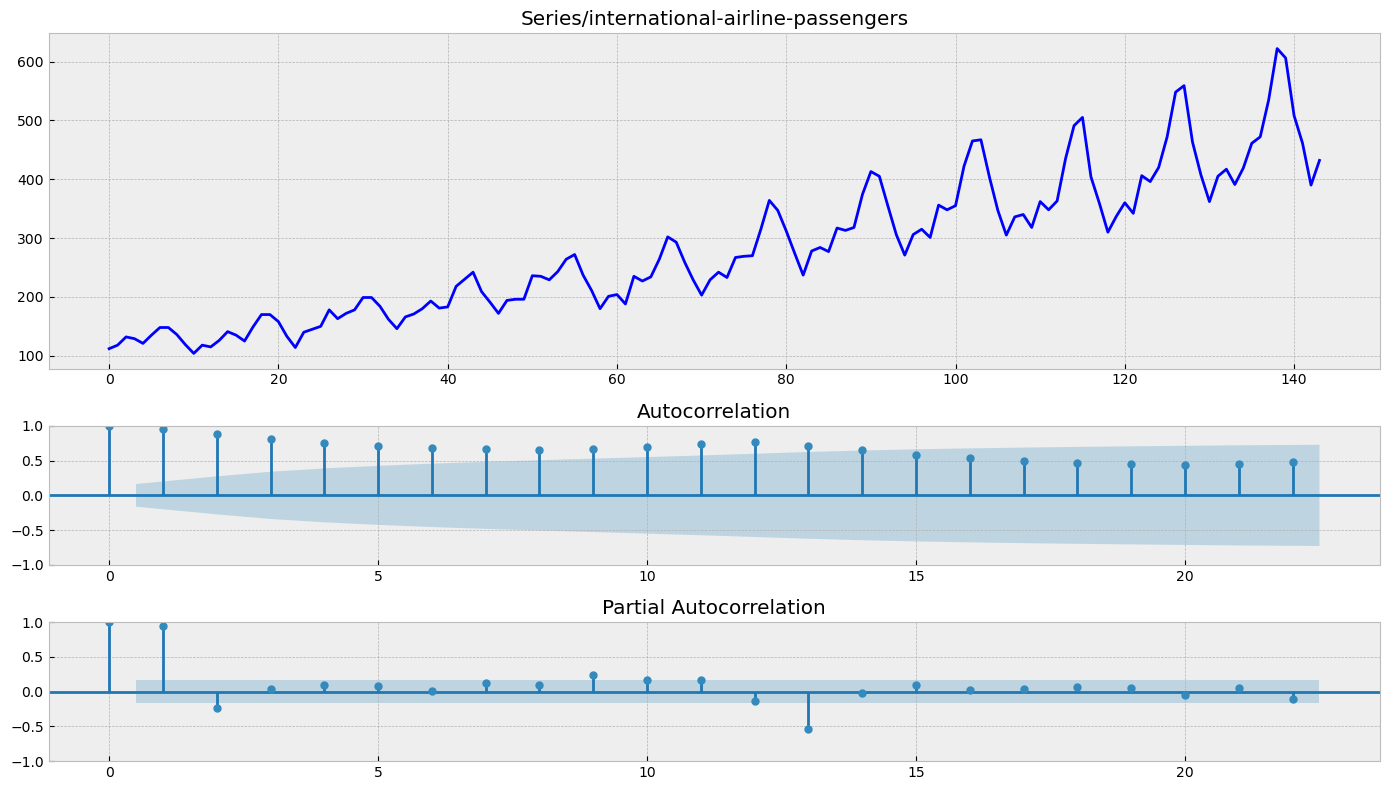

In [26]:
ts = еairlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")['Count']
nplt = 'Series/international-airline-passengers'
tsplot(ts,tsname = nplt)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


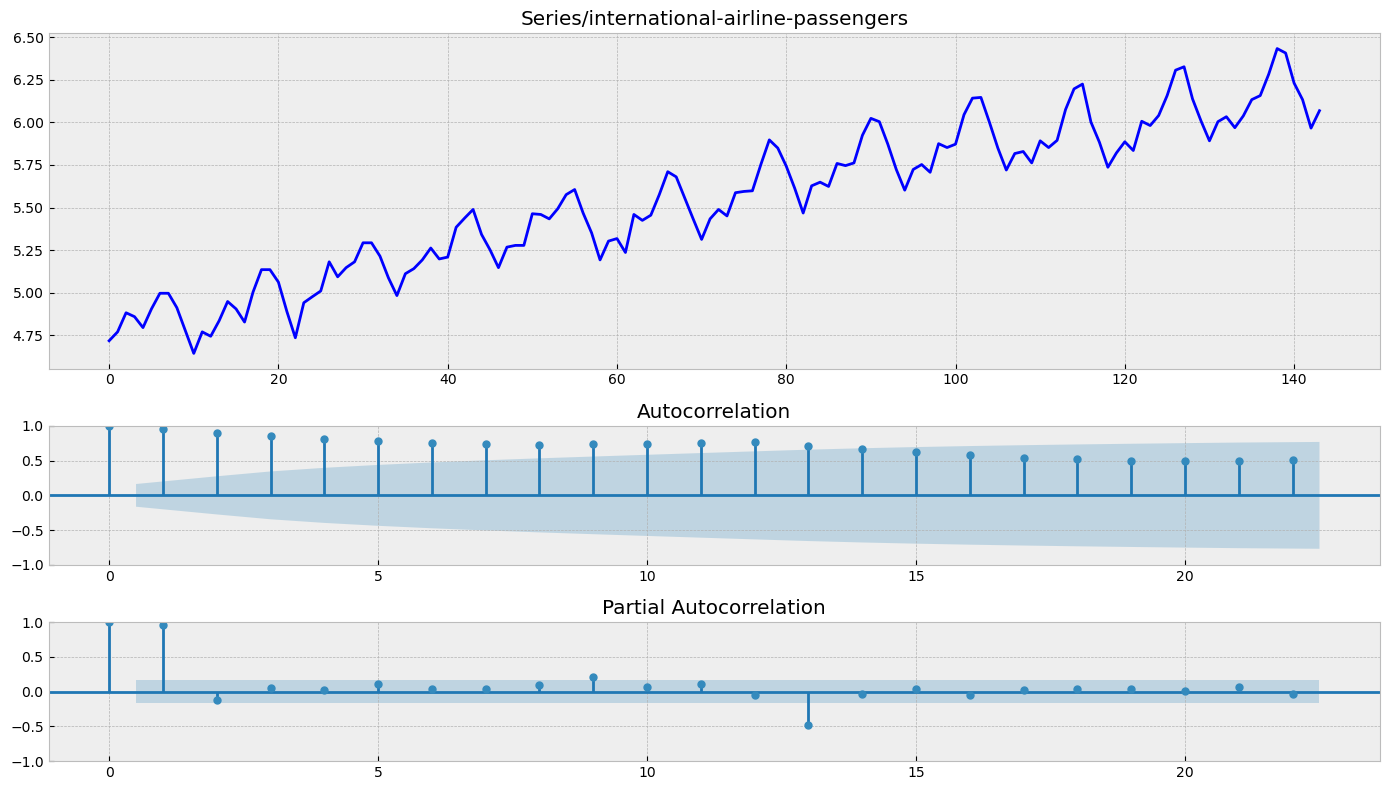

In [27]:
# Ряд не стационарный, тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. 
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
ts = boxcox(ts, 0)
tsplot(ts,tsname = nplt)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


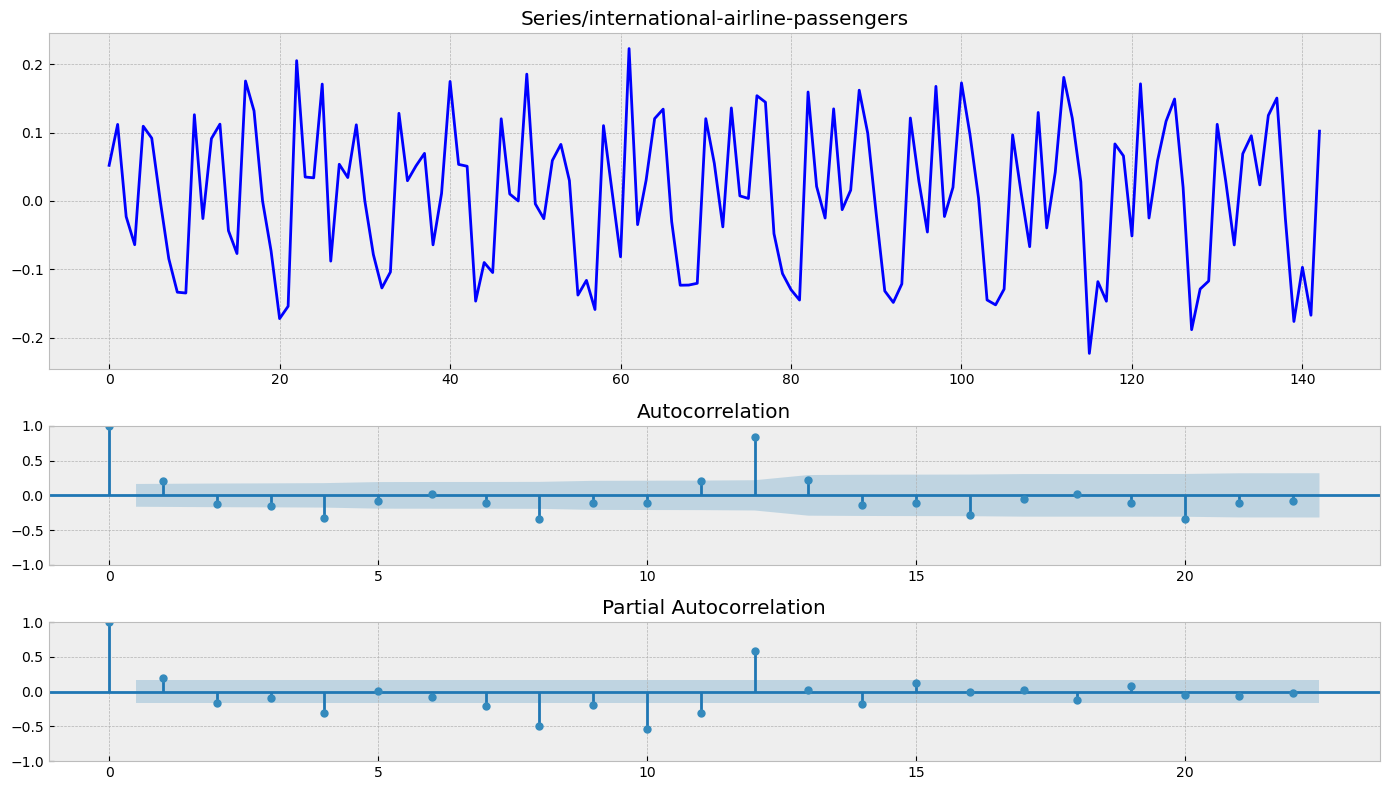

In [28]:
# Дифференцируем ряд
ts = np.diff(ts, 1)
tsplot(ts,tsname = nplt)

Results of Dickey-Fuller Test:
Test Statistic                -1.609085e+01
p-value                        5.255378e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


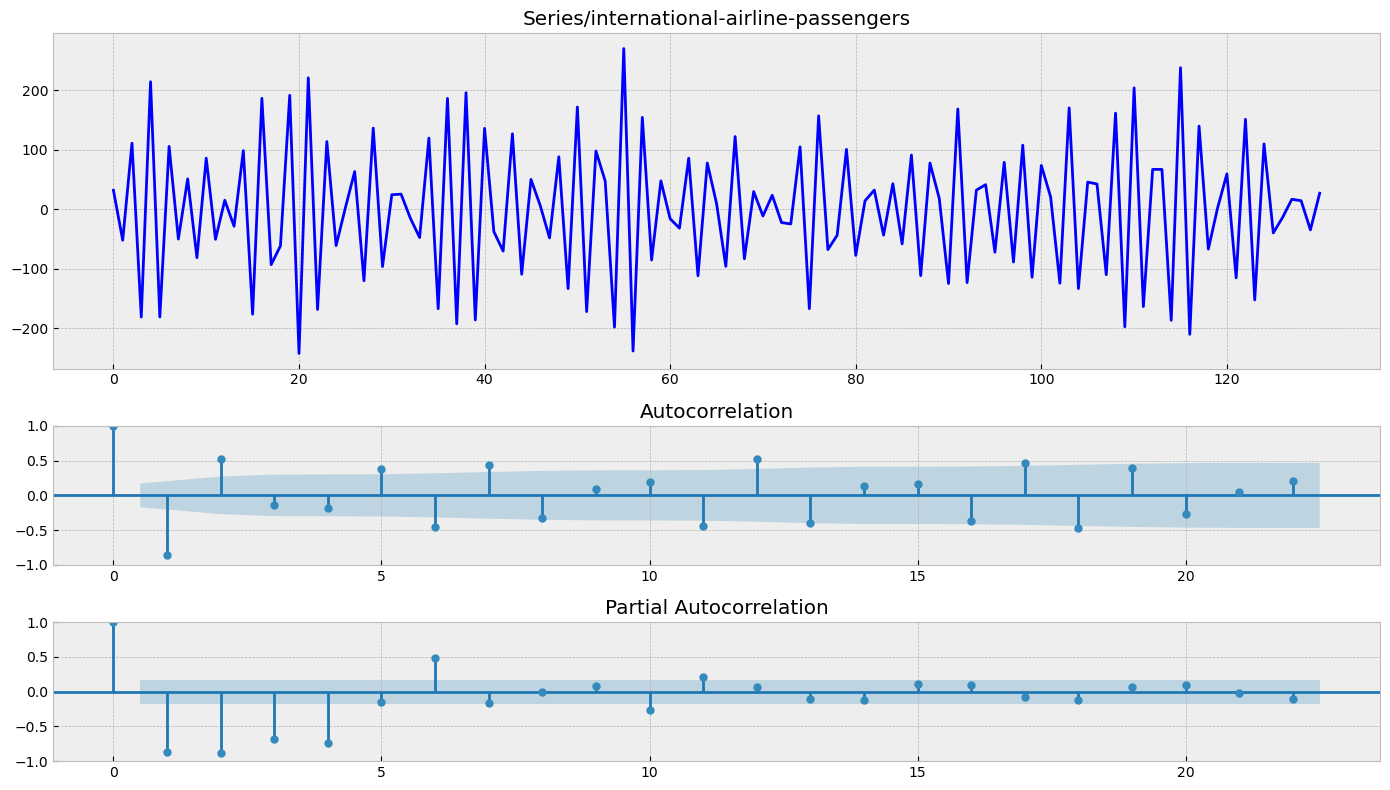

In [29]:
# Дифференцируем ряд
ts = np.diff(ts, 12)
tsplot(ts,tsname = nplt)

p-value 5.255378e-29 (0) временной ряд стационарен

Series/mean-monthly-air-temperature-deg

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


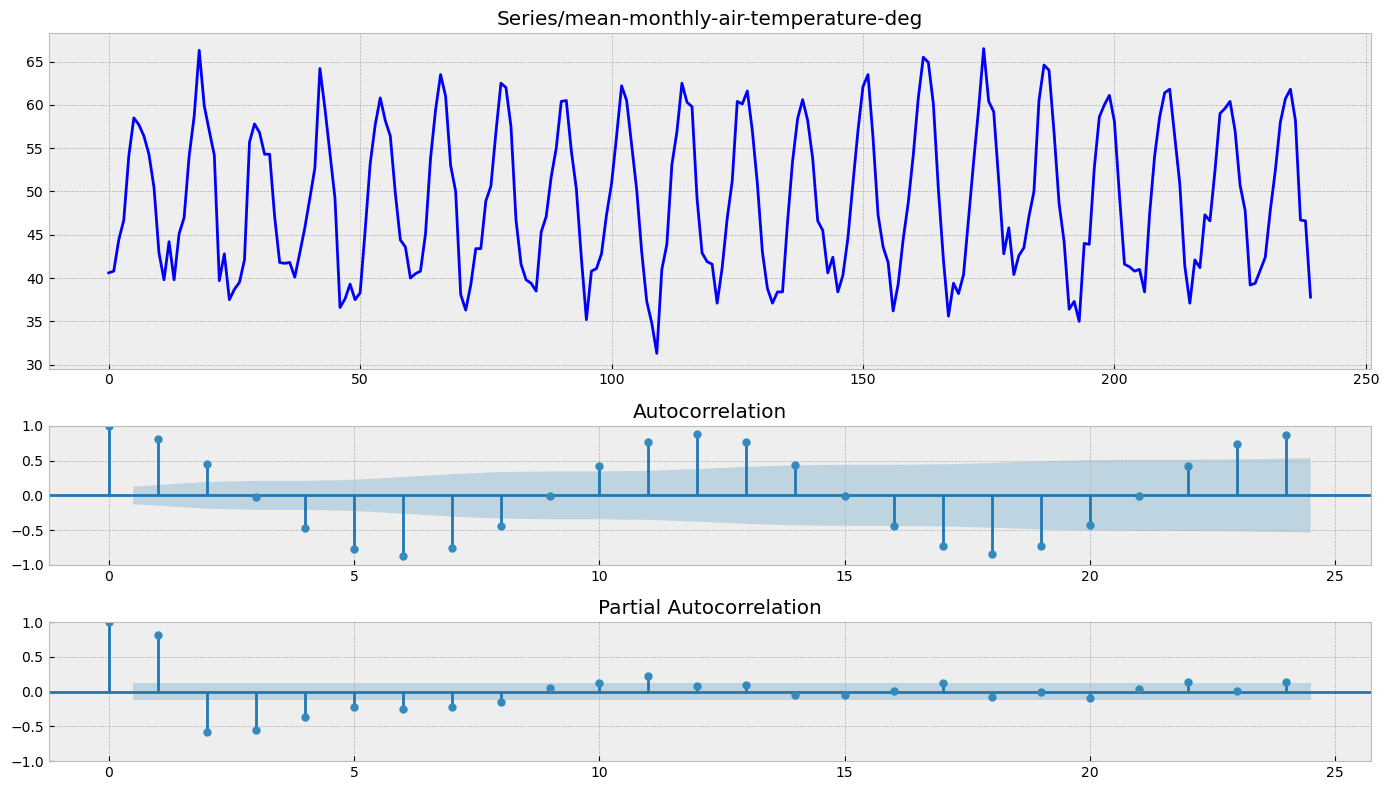

In [33]:
ts = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']
nplt = 'Series/mean-monthly-air-temperature-deg'
tsplot(ts,tsname = nplt)

p-value  0.016989 < 0.05, Test Statistic -3.255492 > Critical Value (1%) -3.459752, можно поробовать убрать сезонность

Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


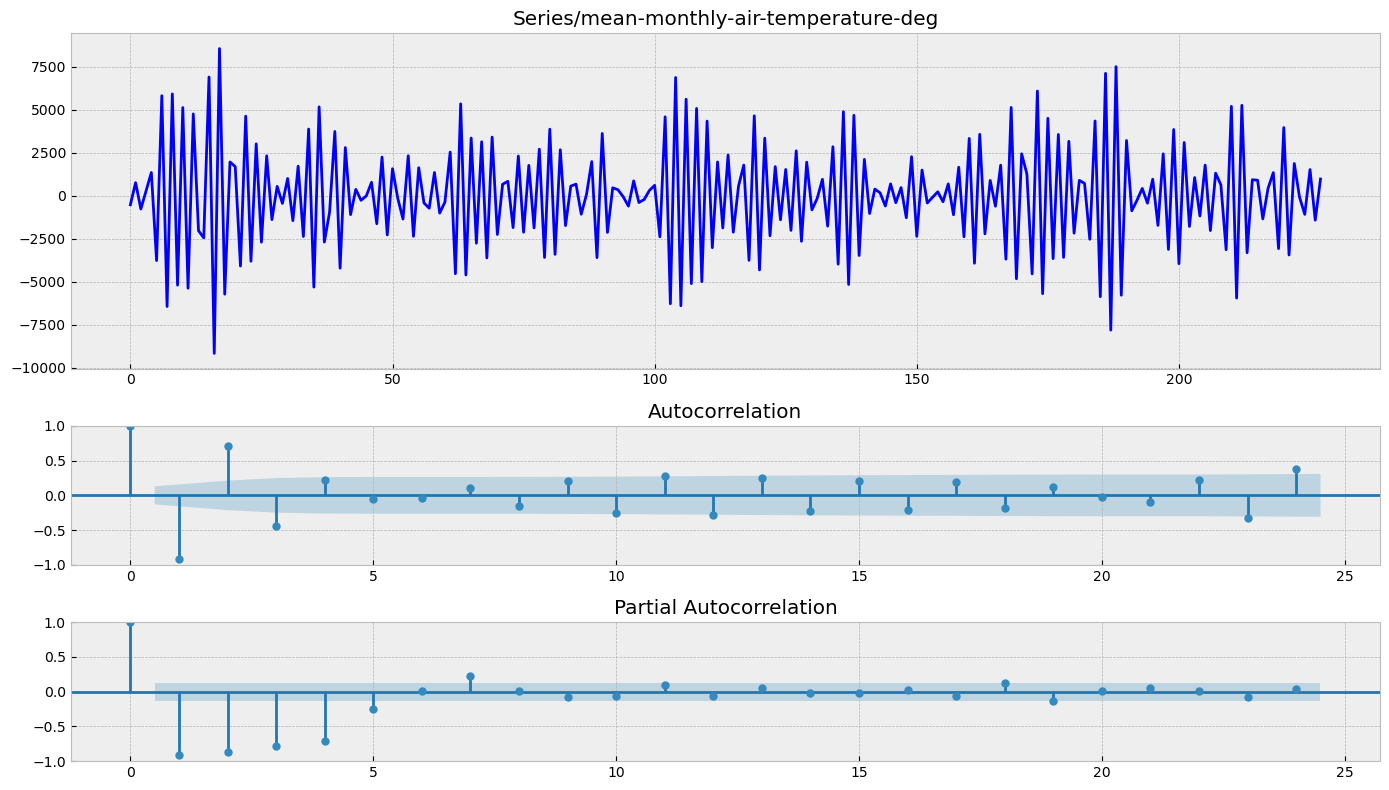

In [35]:
# Дифференцируем ряд
ts = np.diff(ts, 12)
tsplot(ts,tsname = nplt)

Полученный ряд точно стационарный

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


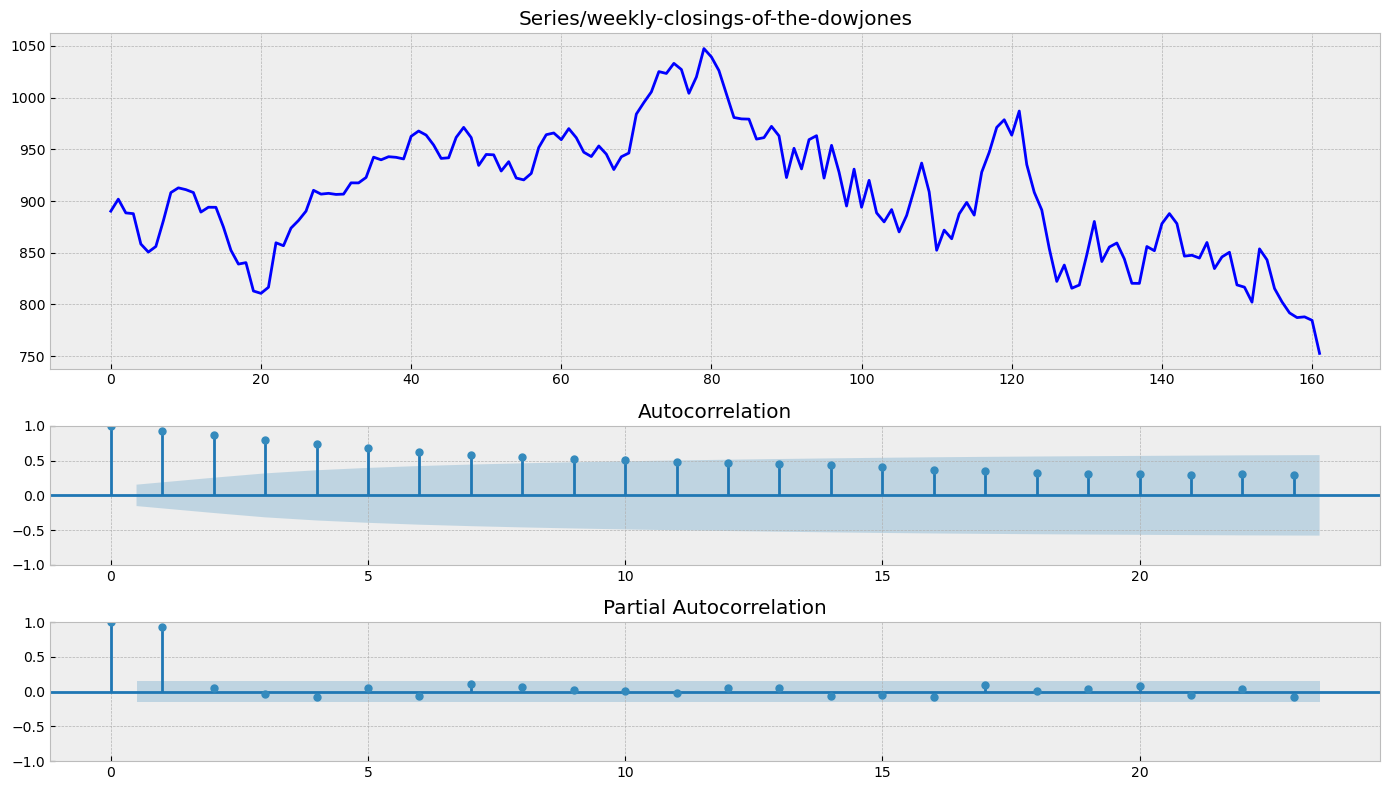

In [42]:
ts = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")['Close']
nplt = 'Series/weekly-closings-of-the-dowjones'
tsplot(ts,tsname = nplt)

Судя по названию это цены закрытия индекса -dowjones и ряд точно не стационарен. На графике есть как растущий, так и падающий тренд

Results of Dickey-Fuller Test:
Test Statistic                -1.189727e+01
p-value                        5.683181e-22
#Lags Used                     1.400000e+01
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64


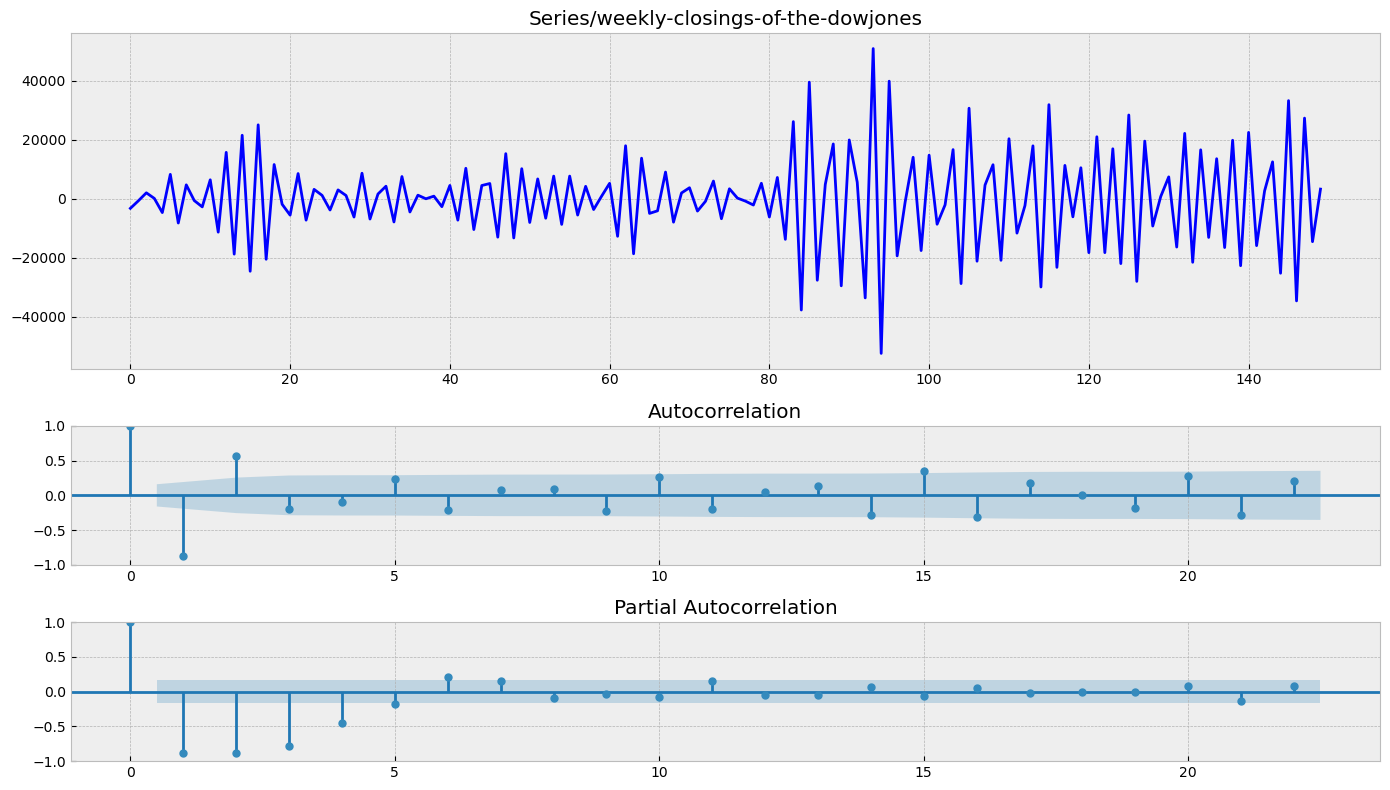

In [43]:
# Дифференцируем ряд
ts = np.diff(ts, 12)
tsplot(ts,tsname = nplt)

p-value 5.683181e-22 < 0.05,Test Statistic  -1.189727e+01 < -3.479743e+00. Теперь ряд стацинарный

Series/daily-total-female-births-in-cal

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


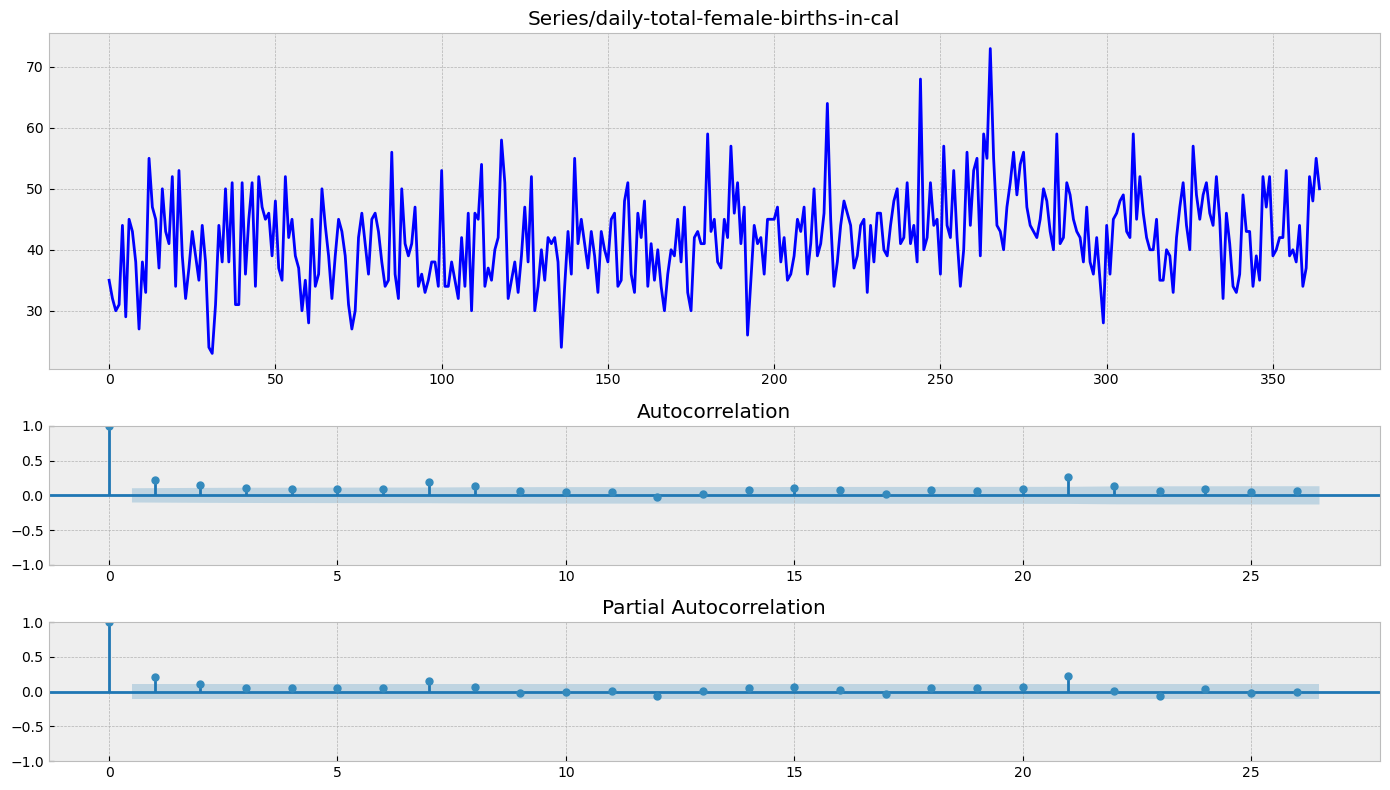

In [48]:
ts = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']
nplt = 'Series/daily-total-female-births-in-cal'
tsplot(ts,tsname = nplt)

In [ ]:
Судя по тестам ряд стационарный
p-value 0.000052